## Solución Desafio Latam

In [1]:
# Librerias
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Parámetros de gráficos
plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
# Paths
dataset_path = './datasets/dataset_SCL.csv'

# Lectura de archivo
df = pd.read_csv(dataset_path, sep=',')

C:\Users\jmetc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Estudio de Datos

In [3]:
# Estudio de datos
def informacion_basica_dataset(dataset, column):
    total_values = len(dataset[column])
    null_values = len(dataset[dataset[column].isnull()])
    unique_values = len(dataset[column].unique())

    result = pd.DataFrame({
        'column': [column],
        'total_values': [total_values],
        'null_values': [null_values],
        'unique_values': [unique_values]
    }
    )

    return result

resumen_df = pd.concat([informacion_basica_dataset(df,col) for col in df.columns])
resumen_df

,column,total_values,null_values,unique_values
0,Fecha-I,68206,0,53252
0,Vlo-I,68206,0,750
0,Ori-I,68206,0,1
0,Des-I,68206,0,64
0,Emp-I,68206,0,30
0,Fecha-O,68206,0,62774
0,Vlo-O,68206,1,867
0,Ori-O,68206,0,1
0,Des-O,68206,0,63
0,Emp-O,68206,0,32


In [4]:
# Tipo de columna
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [5]:
# Extracto del dataset
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


Text(0.5, 1.0, 'Distribución diaria de vuelos')

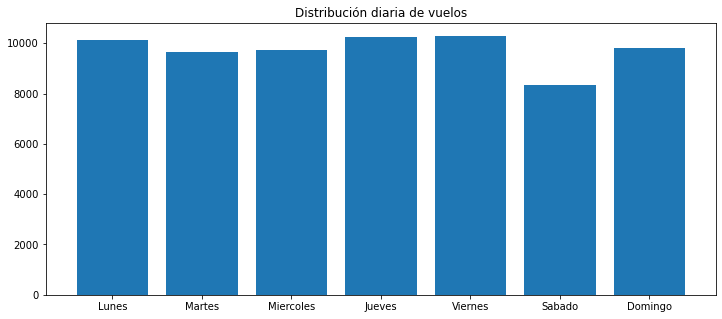

In [6]:
# Ver Distribuciones
# Intuicion: Al ser algo que funciona a diario, primero veremos distribucion diaria, luego mensual.
dias_list = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
dias_values = list(df['DIANOM'])
dias_count_list = [dias_values.count('Lunes'), 
                    dias_values.count('Martes'), 
                    dias_values.count('Miercoles'), 
                    dias_values.count('Jueves'),
                    dias_values.count('Viernes'),
                    dias_values.count('Sabado'),
                    dias_values.count('Domingo')]
plt.bar(dias_list, dias_count_list)
plt.title('Distribución diaria de vuelos')

Text(0.5, 1.0, 'Distribución mensual de vuelos')

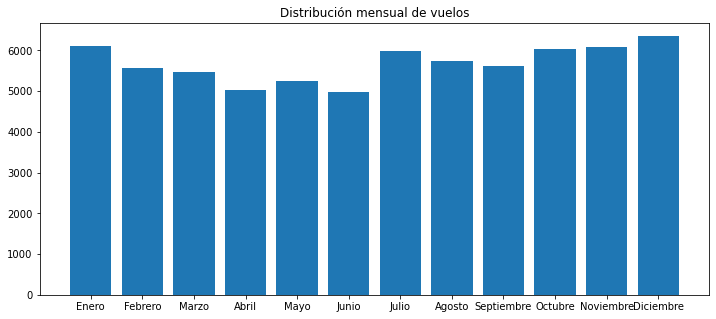

In [7]:
# Hacemos lo mismo de manera mensual
meses_list = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
              'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
meses_values = list(df['MES'])
meses_count_list = [meses_values.count(x) for x in np.unique(np.array(meses_values))]
plt.bar(meses_list, meses_count_list)
plt.title('Distribución mensual de vuelos')

## Pregunta 1

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

R: Los datos distribuyen más o menos "similares", con variaciones de hasta un 20% aproximadamente si comparamos los valores extremos. No tiene una distribución de las conocidas, como la normal, la exponencial, o la t de student.

En el caso de los vuelos diarios, se puede ver que el día sabado es el que presenta la menor cantidad de vuelos, mientras que el viernes es el que tiene la mayor cantidad, la cual se asemeja bastante a la del lunes y a la del jueves. Esto se podia explicar en parte por los trabajos de turno del tipo 4x3, donde la gente parte el lunes, y vuelve el jueves en la noche, o viernes de madrugada, dependiendo de a que hora partieron el lunes.

Por otra parte, junio es el mes con la menos cantidad de viajes, mientras que diciembre es el mes con la mayor cantidad de vuelos, seguido por enero y diciembre. Esto se puede explicar por el inicio del verano, y las vacaciones de los estudiantes. Así mismo, en Julio se nota una importante subida, posiblemente debido a las vacaciones de invierno.

## Generación Nuevas Columnas

In [8]:
def agregar_temporada_alta(fecha):
    
    """
    Se define como:
        1,  si fecha esta entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep
        0, si no
    """
    
    anno = fecha.year
    
    # fecha está entre 15-Dic y 3-Mar
    restriccion_011 = (fecha>=datetime.date(anno, 12, 15) and fecha<=datetime.date(anno, 12, 31))
    restriccion_012 = (fecha>=datetime.date(anno, 1, 1) and fecha<=datetime.date(anno, 3, 3))
    
    # fecha está entre 15-Jul y 31-Jul
    restriccion_02 = (fecha>=datetime.date(anno, 7, 15) and fecha<=datetime.date(anno, 7, 31))

    
    # fecha está entre 11-Sep y 30-Sep
    restriccion_03 = (fecha>=datetime.date(anno, 9, 11) and fecha<=datetime.date(anno, 9, 30))

    if  restriccion_011 or restriccion_012 or restriccion_02 or restriccion_03:
        return 1
    
    else: 
        return 0

In [9]:
def agregar_dif_min(dias):
    
    """
    dif_min : diferencia en minutos entre Fecha-O y Fecha-I
    """
    
    return divmod(dias.total_seconds(), 60)[0]

In [10]:
def agregar_atraso_15(minutos):
    
    """
    1 si minutos > 15, 0 si no
    """
    
    return 1 if minutos > 15 else 0

In [11]:
def agregar_periodo_dia(hora):
    
    """
    Mañana (entre 5:00 y 11:59)
    Tarde (entre 12:00 y 18:59) 
    Noche (entre 19:00 y 4:59)
    Todo en base a Fecha-I

    """
    
    # manana (entre 5:00 y 11:59)
    manana = hora >= datetime.time(5,0) and hora <= datetime.time(11,59)
    
    # tarde (entre 12:00 y 18:59)
    tarde =  hora >= datetime.time(12,0) and hora <= datetime.time(18,59)
        
    # noche (entre 19:00 y 4:59) 
    noche_01 =   hora >= datetime.time(19,0) and hora <= datetime.time(23,59)
    noche_02 =   hora >= datetime.time(0,0) and hora <= datetime.time(4,59)
    
    if manana:
        return "mañana"
    
    elif tarde:
        return "tarde"
    
    elif noche_01 or noche_02:
        return "noche"
    
    else:
        return "-"

In [12]:
# Generamos nuestras nuevas columnas
df['temporada_alta'] = df['Fecha-I'].apply(lambda x: agregar_temporada_alta(x))
df['dif_min'] = (df['Fecha-O']-df['Fecha-I']).apply(lambda x:agregar_dif_min(x)).astype(int)
df['atraso_15'] = df['dif_min'] .apply(lambda x: agregar_atraso_15(x))
df['periodo_dia'] = df['Fecha-I'].dt.time.apply(lambda x:agregar_periodo_dia(x))

## Pregunta 2

In [13]:
# Generamos nuevo archivos csv y exportamos
synthetic_features = df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']]
synthetic_features.to_csv('./datasets/synthetic_features.csv', sep=',', index=False)

## Pregunta 3
¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

In [14]:
# Agrupamos las componentes
columns = ['Des-O','OPERA','MES','DIANOM','temporada_alta','TIPOVUELO']


for col in columns:
    print(col)
    print(df.groupby(col)['dif_min'].agg({min,max,np.mean}).reset_index())#.sort_values('dif_min'))
    print()

Des-O
   Des-O  min       mean  max
0   CYYZ  -14  15.766784  147
1   EGLL  -11   7.560976  124
2   EGYP   50  50.000000   50
3   KATL  -14   0.114525  118
4   KDFW  -14  -1.081232  110
..   ...  ...        ...  ...
58  SPSO    2   2.000000    2
59  SULS   -6   8.500000   39
60  SUMU  -10  10.400563  159
61  YMML   -2  19.256410   61
62  YSSY   -7  26.948454  159

[63 rows x 4 columns]

OPERA
                       OPERA  min       mean  max
0      Aerolineas Argentinas  -14  10.004618  154
1                 Aeromexico  -14  -2.495726  138
2                 Air Canada  -14  22.909735  152
3                 Air France  -14   1.399441   70
4                   Alitalia  -14   5.293436  151
5          American Airlines  -14   0.277411  160
6                    Austral  -14   6.608108   47
7                    Avianca  -14  11.131944  159
8            British Airways  -11   7.560976  124
9                   Copa Air  -14   0.214054  151
10                 Delta Air  -14   0.114525  118
11  

In [15]:
# Revisaremos los 10 promedios más altos de viajes
df.groupby('Des-O')['dif_min'].agg('mean').sort_values(ascending=False)[:10]

Des-O
SLCB    113.000000
SEQM     52.000000
EGYP     50.000000
YSSY     26.948454
SAWH     24.500000
YMML     19.256410
SAAR     19.022059
SAZS     18.500000
NZAA     18.246537
CYYZ     15.766784
Name: dif_min, dtype: float64

## Respuesta

Primero, decir que se comparan las columnas con la columna dif_min, ya que esta nos dice de la diferencia en minutos entre la fecha real de llegada vs la programada, es decir, si se llega después de lo programado, el valor sera positivo, caso contrario sera negativo.

Se podría intuir que lo que más influye en los atrasos de los vuelos es si la temporada es alta o no, ya que habrian más aviones que mover, maletas que transportar, pasajeros que mover, es decir, toda la operación sería más lenta.

También se podria esperar que el destino influye bastante en los atrasos, ya que si hay cualquier turbulencia o problema durante el viaje, es un atraso que quizas no se pueda recuperar más adelante en el viaje.

En este set de datos, el destino que tuvo en promedio el mayor atraso fue SLCB, asociado a el aeropuerto de Cochambamba, seguido por SEQM (Quito), y EGYP (Puerto Stanley).

Es un poco contra intuitivo que ciudades que queden tan cerca presenten los mayores atrasos, habría que estudiar mejor el porqué de este fenomeno.

## Pregunta 4 y 5
Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?

Primero, notemos que el problema se trata de una predicción "binaria", ya que nos interesa ver si un vuelo se atrasa, o no, independiente del atraso.

In [16]:
# Libreria a importar

from sklearn.model_selection import train_test_split
from sklearn import metrics
import lightgbm as lgb

In [17]:
# Definimos nuestros features y el target de la predicción
features=  ['Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLADES', 'temporada_alta', 'periodo_dia']

target = 'atraso_15'

In [18]:
# Definimos nuestro set de entrenamiento
X = df[features]

for col in ['Emp-O', 'TIPOVUELO', 'OPERA', 'SIGLADES','DIANOM','periodo_dia']:
    X[col] = X[col].astype('category')

Y = df[target]


# Separamos el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

<ipython-input-18-fb9695bb7616>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [19]:
# Entrenamos el modelo
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier()

In [20]:
# Para evaluar el modelo, usamos la matriz de confusión
y_true =  list(Y_test)
y_pred = list(clf.predict(X_test))

print('\nMatriz de confusion:\n ')
print(metrics.confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[11002   157]
 [ 2192   291]]


Con el modelo usado sobre el dataset, se obtiene:
<br>True Positive: 11002
<br>False Positive: 157
<br>False Negative: 2192
<br>True Negative: 291

In [21]:
# Otras métricas
print('Accuracy: ', metrics.accuracy_score(y_true,y_pred))
print('Precision: ', metrics.precision_score(y_true,y_pred))
print('Recall: ', metrics.recall_score(y_true,y_pred))

Accuracy:  0.8278111713824953
Precision:  0.6495535714285714
Recall:  0.11719693918646798


Performance: Accuracy del 83%
<br>
<br>En este caso, consideramos que el Accuracy sería una buena metrica a considerar, ya que esta nos indica que tan cerca están de un valor, que finalmente es lo que nos importa: Que tan problable es que un vuelo se atrase o no. Ahora, esto se vería altamente beneficiado por una Precision aun mayor, pero usualmente esto afecta el desempeño del Accuracy, por lo que habria que probar otro modelo, o inyectar otras variables como:
<br>- Clima
<br>- Antiguedad de Piloto
<br>- Cantidad de Equipaje
<br>- Entre otras
<br>
<br>La razón de porque se uso este modelo es que las variables por lo general estan bien definidas, y no son una cantidad muy grande (12 meses, 7 dias, etc), por lo que el modelo tiene un mejor rendimiento que con problemas con variables mas continuas, además de ser bastante rápido en su ejecución, entregando una buena idea de las métricas a las que se deben llegar con otros modelos.
<br>

In [22]:
# Para ver los primeros 10 resultados de la predicción, se puede usar el siguiente comando:
y_pred_proba = list(clf.predict_proba(X_test)[:,1])
y_pred_proba[:10]

[0.09929625575230891,
 0.36880604278279916,
 0.13896405408454193,
 0.07187013177708602,
 0.0897751966600599,
 0.30088604716578393,
 0.0714626032043447,
 0.2118175886186684,
 0.18816092020485828,
 0.09328129758851945]